<a href="https://colab.research.google.com/github/youngsoopar/Aiffel_Core_Quest/blob/main/Node/Finish_deep_learning_at_once_Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Boston 주택 가격 예측 모델


In [17]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [18]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data -= mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data /= std
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data -= mean
test_data /= std

In [19]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
21/21 [==============================] - 1s 15ms/step - loss: 555.3476 - mae: 21.7101 - val_loss: 581.5599 - val_mae: 22.3420
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 473.5527 - mae: 19.7246 - val_loss: 472.2957 - val_mae: 19.8408
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 348.2964 - mae: 16.4252 - val_loss: 307.2198 - val_mae: 15.4569
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 184.0431 - mae: 11.3070 - val_loss: 131.4442 - val_mae: 9.1658
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 75.4147 - mae: 6.8728 - val_loss: 62.8400 - val_mae: 6.1661
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 48.7537 - mae: 5.2598 - val_loss: 41.6577 - val_mae: 4.9337
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 34.4468 - mae: 4.2984 - val_loss: 30.7901 - val_mae: 4.2215
Epoch 8/10
21/21 [==============================] - 0s 3ms/s

<ipython-input-21-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


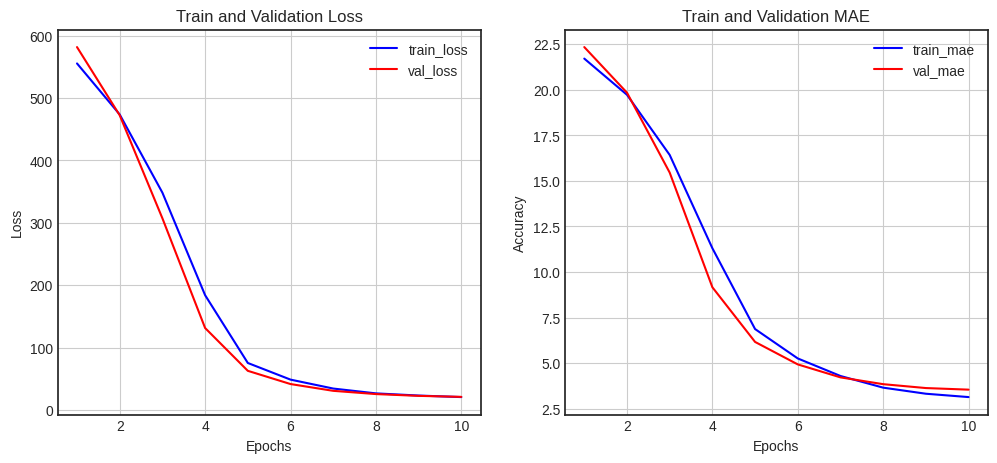

In [21]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 27.1259 - mae: 4.0306


## 2. Reuters 딥러닝 모델


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import reuters

In [24]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(X_train_full, y_train_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1234)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [25]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
      results[i, d] = 1.0
  return results
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [26]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu', name='hidden2'))
model.add(layers.Dense(46, activation='softmax', name='output'))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 hidden2 (Dense)             (None, 128)              

In [28]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters.load.data.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=30,batch_size= 10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
674/674 [==============================] - 16s 22ms/step - loss: 1.6585 - accuracy: 0.6056 - val_loss: 1.2721 - val_accuracy: 0.7008
Epoch 2/30
674/674 [==============================] - 12s 17ms/step - loss: 1.1667 - accuracy: 0.7162 - val_loss: 1.1063 - val_accuracy: 0.7462
Epoch 3/30
674/674 [==============================] - 12s 17ms/step - loss: 0.9367 - accuracy: 0.7662 - val_loss: 1.0313 - val_accuracy: 0.7587
Epoch 4/30
674/674 [==============================] - 12s 18ms/step - loss: 0.7868 - accuracy: 0.7985 - val_loss: 1.0263 - val_accuracy: 0.7814
Epoch 5/30
674/674 [==============================] - 12s 17ms/step - loss: 0.6574 - accuracy: 0.8233 - val_loss: 1.0158 - val_accuracy: 0.7774
Epoch 6/30
674/674 [==============================] - 13s 19ms/step - loss: 0.5678 - accuracy: 0.8483 - val_loss: 1.0703 - val_accuracy: 0.7818
Epoch 7/30
674/674 [==============================] - 12s 17ms/step - loss: 0.4961 - accuracy: 0.8624 - val_loss: 1.1555 - val_accuracy:

<ipython-input-29-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


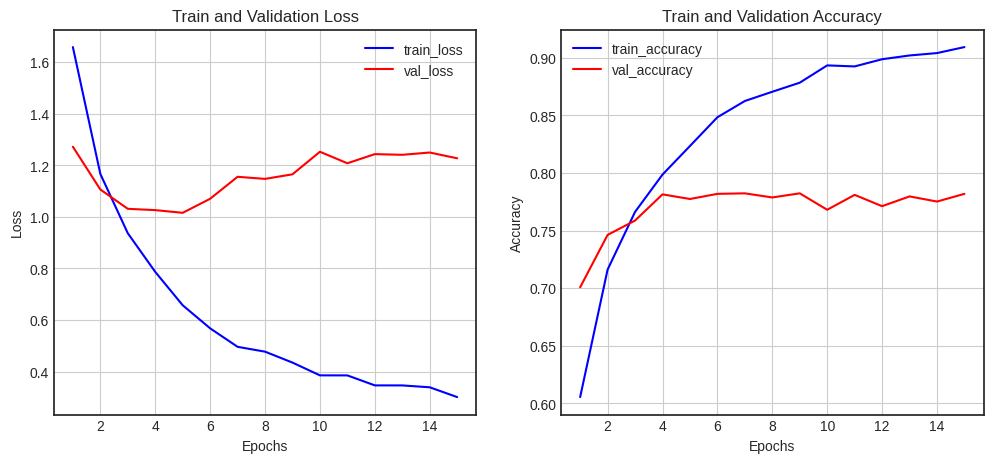

In [29]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [30]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0404 - accuracy: 0.7769


[1.040408968925476, 0.7769367694854736]

## 3. CIFAR10 딥러닝 모델

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [32]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=1234)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("검증 데이터: {} 레이블: {}".format(val_data.shape, val_labels.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [33]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-34-cdb35b8b18f6>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


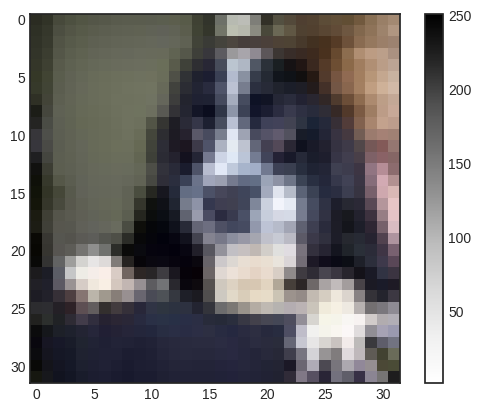

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
# 훈련 데이터의 0번째인 train_data[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.show()

# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(train_data.shape)
print(val_data.shape)
print(x_test.shape)

In [35]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
train_data = train_data.reshape(40000, 32 * 32 * 3)
val_data = val_data.reshape(10000, 32 * 32 * 3)
x_test = x_test.reshape(10000, 32 * 32 * 3)


print(train_data.shape)
print(val_data.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
train_data = train_data / 255.
val_data = val_data / 255.
x_test = x_test / 255.

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [36]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels, num_classes=10)
y_val = to_categorical(val_labels, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(3072,), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', name='hidden'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', name='hidden_2'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu', name='hidden_3'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax', name='output'))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 2048)              6293504   
                                                                 
 batch_normalization_8 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 hidden (Dense)              (None, 2048)              4196352   
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 hidden_2 (Dense)            (None, 1024)             

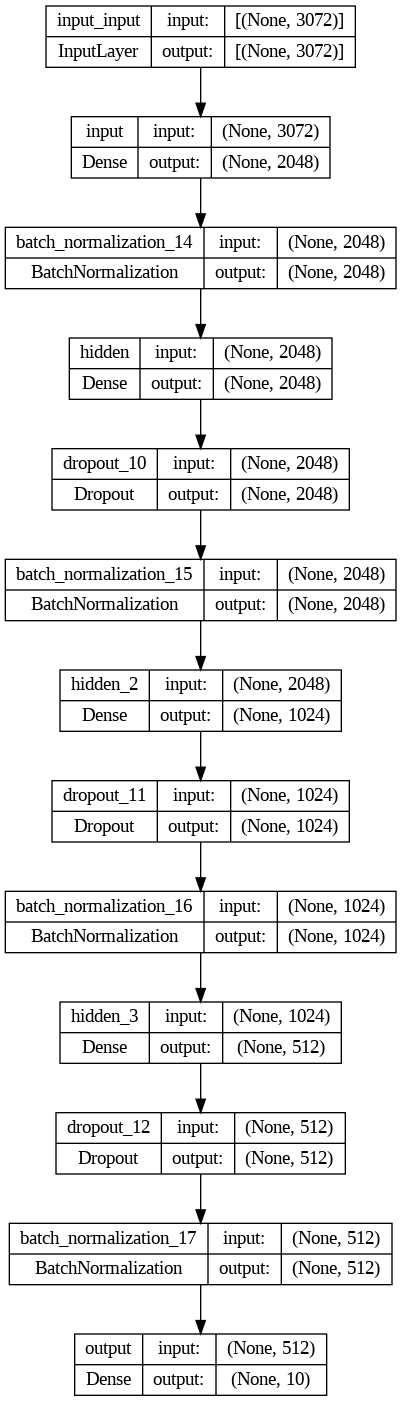

In [37]:
utils.plot_model(model, show_shapes=True)

In [39]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.load.data.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(train_data, y_train, epochs=5,batch_size= 10000,
                    validation_data=(val_data, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/5
4/4 [==============================] - 62s 16s/step - loss: 2.3052 - accuracy: 0.2603 - val_loss: 20.5750 - val_accuracy: 0.0983
Epoch 2/5
4/4 [==============================] - 63s 17s/step - loss: 2.2193 - accuracy: 0.2767 - val_loss: 31.0335 - val_accuracy: 0.0984
Epoch 3/5
4/4 [==============================] - 62s 16s/step - loss: 2.1029 - accuracy: 0.3008 - val_loss: 28.1845 - val_accuracy: 0.0983
Epoch 4/5
4/4 [==============================] - 57s 15s/step - loss: 2.0198 - accuracy: 0.3168 - val_loss: 29.9100 - val_accuracy: 0.0982
Epoch 5/5
4/4 [==============================] - 56s 14s/step - loss: 1.9610 - accuracy: 0.3268 - val_loss: 25.0553 - val_accuracy: 0.0997


<ipython-input-40-520ccc6b2eab>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


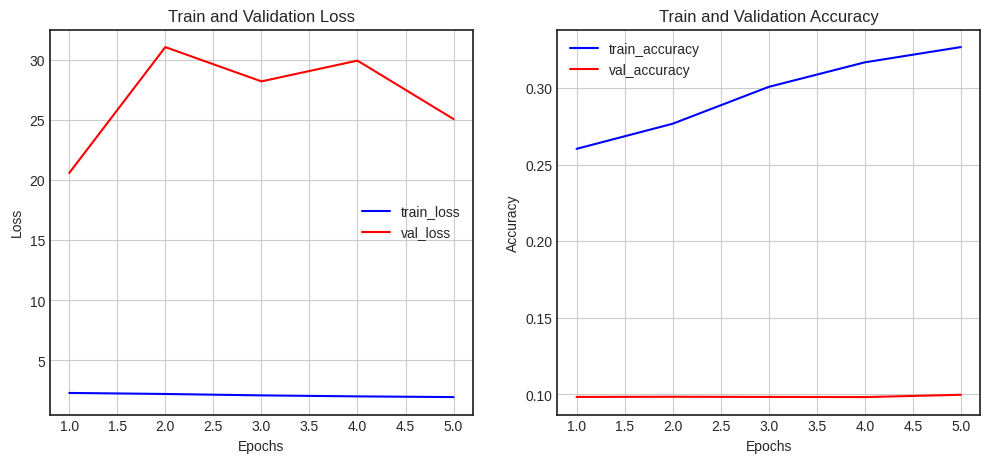

In [40]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [41]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 25.1807 - accuracy: 0.1022


[25.18065643310547, 0.10220000147819519]